### Load Data

In [1]:
import pandas as pd

eeg_file = "../../data/Rubert_14_may/Rubert_mordida_1/EEG.csv"

df = pd.read_csv(eeg_file)
df.head()

,timestamp,sequence,battery,flags,EEG-ch1,EEG-ch2,EEG-ch3,EEG-ch4,EEG-ch5,EEG-ch6,EEG-ch7,EEG-ch8,EEG-ch9,EEG-ch10,EEG-ch11,EEG-ch12,EEG-ch13,EEG-ch14,EEG-ch15,EEG-ch16
0,153804687683,16336,-2,0,-2553.890054,-6876.865884,31106.838605,214.528663,22527.894451,8132.718209,21134.279463,30553.415250,-10230.794172,-5388.805234,17134.538498,10109.798595,-17322.626756,17221.805220,-10619.150551,9531.200275
1,153804687683,16336,-2,0,-2557.710711,-6880.297175,31105.195966,214.772017,22528.880034,8132.827718,21137.443064,30554.473840,-10229.407054,-5388.087339,17137.081547,10109.774259,-17321.945365,17222.158083,-10620.878364,9531.504468
2,153804687683,16336,-2,0,-2570.961333,-6885.176421,31096.520398,210.002279,22524.438825,8130.528023,21134.948686,30551.626599,-10230.392638,-5389.218935,17135.268560,10101.329878,-17325.364488,17223.642542,-10621.778774,9531.832996
3,153804687683,16336,-2,0,-2585.039358,-6887.330103,31091.774996,201.935096,22518.805181,8127.899801,21129.205533,30548.767190,-10233.677916,-5390.934580,17132.956698,10096.827830,-17330.377579,17223.715548,-10622.642680,9530.056512
4,153804687683,16336,-2,0,-2573.200189,-6886.064663,31095.473976,200.523644,22517.126039,8126.330168,21127.404714,30550.957375,-10236.634666,-5391.761984,17130.401481,10101.926095,-17333.188317,17223.350517,-10622.022128,9527.744649


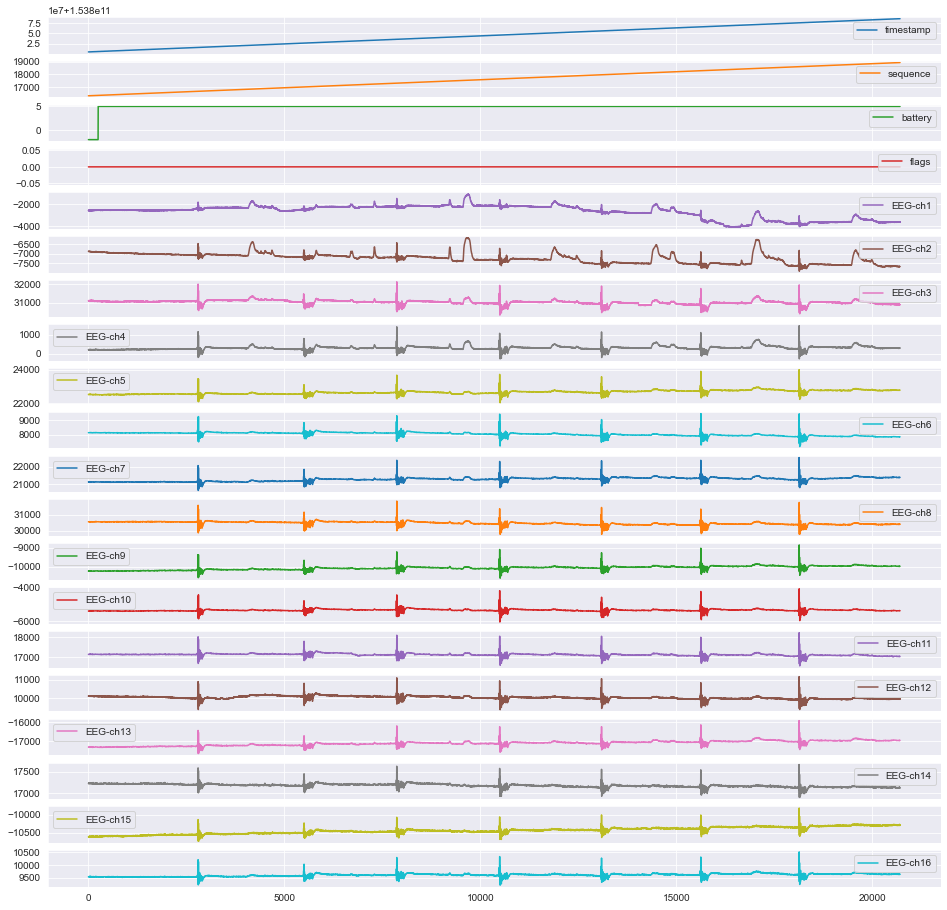

In [2]:
df.plot(subplots=True, figsize=(16, 16));

### Loading Data with BBT to operate on Frequency

In [1]:
import bbtools as bbt

eeg_file = "../../data/Rubert_14_may/Rubert_mordida_1/EEG.csv"

raw_rubert = bbt.read_csv(eeg_file,
                        ['Fp1', 'Fp2', 'F3', 'F4', 'C1', 'C3', 'C2', 'C4', 'CP1', 'CP3', 'CP2', 'CP4', 'Cz', 'O1', 'O2', 'Pz'])

Creating RawArray with float64 data, n_channels=16, n_times=20712
    Range : 0 ... 20711 =      0.000 ...    80.902 secs
Ready.


Effective window size : 8.000 (s)


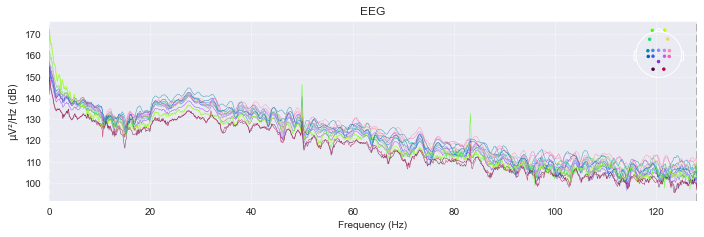

In [2]:
plot_raw = raw_rubert.plot_psd(fmin = 0, fmax = 128, average=False, tmin = 0, tmax = 120)
#plot_raw = raw_rubert.plot_psd(fmin = 0, fmax = 128, average=True, tmin = 0, tmax = 120)
#plot_raw = raw_rubert.plot_psd()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (6.605 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Effective window size : 8.000 (s)


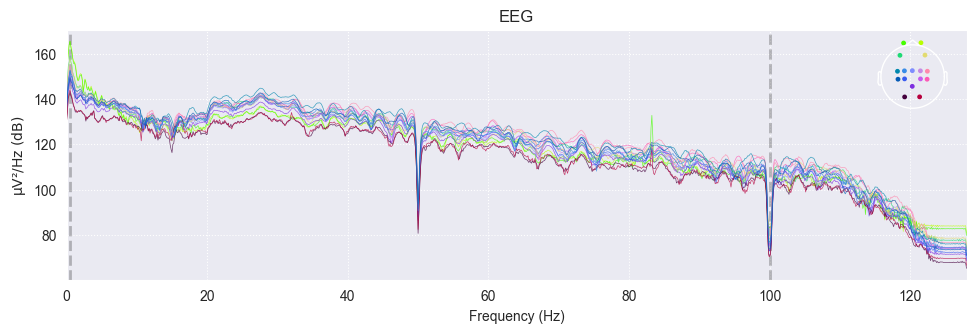

In [3]:
filtered_rubert = bbt.filters(raw_rubert)
plot_filtered = filtered_rubert.plot_psd(fmin = 0, fmax = 128, average=False, tmin = 0, tmax = 120)

### Slicing into smaller temporal windows

In [4]:
import bbtools as bbt

sampling_rate = 256
window_time = 2.5 # segs
window_size = int(window_time * sampling_rate)
n_channels = 16

eeg_data = filtered_rubert['data'][0]
channelsData = bbt.signal_raw_to_windows(eeg_data, window_size, n_channels)

print("channels, windows, samples")
print(channelsData.shape)

channels, windows, samples
(16, 32, 640)


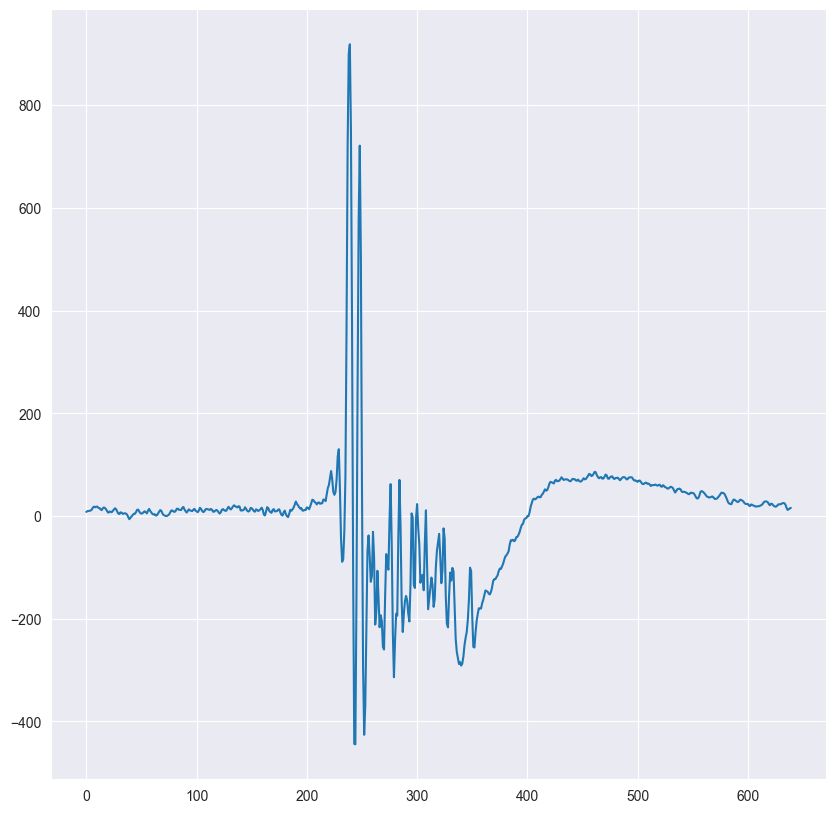

In [5]:
import matplotlib.pyplot as plt

channel = channelsData[3]
# shape (samples, window)

# Data sequence
# pause pause signal pause ...

window = channel[4]

plt.figure(figsize=(10,10))
plt.plot(window)
plt.show()

### Labeling data

In [6]:
channels_list_df = bbt.channels_to_list_df2(channelsData, 'jaw')

channel = channels_list_df[0]
channel.head()

,label,0,1,2,3,4,5,6,7,8,...,630,631,632,633,634,635,636,637,638,639
0,pause,1.509903e-13,-8.314399,-20.028939,-28.886491,-15.031571,-0.850370,-10.295577,-20.844364,-20.410856,...,0.303791,-2.568832,0.608712,-2.316045,-4.049271,1.346005,1.816177,-2.104300,-2.706026,-2.606916
1,pause,-1.144761e+00,5.176900,8.648309,7.549453,8.313966,0.420466,-9.998483,-9.405165,-8.633105,...,-0.153260,-0.299125,1.552851,-1.995532,-1.793090,1.191236,-7.406124,-16.575125,-16.872952,-13.765452
2,pause,-4.001054e+00,7.160566,3.916823,-3.079167,-2.152266,-6.830789,-9.327091,-5.670124,-9.084604,...,4.339764,9.693440,10.358554,5.411518,8.663897,6.821644,-2.691291,-6.173152,-11.413765,-22.038039
3,pause,-2.073577e+01,-17.023138,-22.796090,-19.638006,-15.083861,-20.866317,-20.026932,-14.012701,-14.527102,...,-19.481610,-19.061410,-23.712220,-26.189348,-20.137827,-20.420724,-22.142430,-19.773305,-27.080993,-36.592636
4,jaw,-3.608855e+01,-39.605743,-49.530045,-45.599690,-33.518257,-25.877388,-18.216421,-20.989840,-34.041296,...,2.600812,9.081029,8.543511,12.225901,14.047675,6.728423,5.593794,12.009989,13.287207,15.000444


In [7]:
for channel_df in channels_list_df:
    channel_df['label'] = channel_df['label'].replace({'pause': 0, 'jaw': 1})

channel = channels_list_df[0]
channel.head()

,label,0,1,2,3,4,5,6,7,8,...,630,631,632,633,634,635,636,637,638,639
0,0,1.509903e-13,-8.314399,-20.028939,-28.886491,-15.031571,-0.850370,-10.295577,-20.844364,-20.410856,...,0.303791,-2.568832,0.608712,-2.316045,-4.049271,1.346005,1.816177,-2.104300,-2.706026,-2.606916
1,0,-1.144761e+00,5.176900,8.648309,7.549453,8.313966,0.420466,-9.998483,-9.405165,-8.633105,...,-0.153260,-0.299125,1.552851,-1.995532,-1.793090,1.191236,-7.406124,-16.575125,-16.872952,-13.765452
2,0,-4.001054e+00,7.160566,3.916823,-3.079167,-2.152266,-6.830789,-9.327091,-5.670124,-9.084604,...,4.339764,9.693440,10.358554,5.411518,8.663897,6.821644,-2.691291,-6.173152,-11.413765,-22.038039
3,0,-2.073577e+01,-17.023138,-22.796090,-19.638006,-15.083861,-20.866317,-20.026932,-14.012701,-14.527102,...,-19.481610,-19.061410,-23.712220,-26.189348,-20.137827,-20.420724,-22.142430,-19.773305,-27.080993,-36.592636
4,1,-3.608855e+01,-39.605743,-49.530045,-45.599690,-33.518257,-25.877388,-18.216421,-20.989840,-34.041296,...,2.600812,9.081029,8.543511,12.225901,14.047675,6.728423,5.593794,12.009989,13.287207,15.000444


In [10]:
channel = channels_list_df[0]

Y = channel_df['label']
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [8]:
X = channel.drop(['label'], axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,630,631,632,633,634,635,636,637,638,639
0,1.509903e-13,-8.314399,-20.028939,-28.886491,-15.031571,-0.850370,-10.295577,-20.844364,-20.410856,-11.766223,...,0.303791,-2.568832,0.608712,-2.316045,-4.049271,1.346005,1.816177,-2.104300,-2.706026,-2.606916
1,-1.144761e+00,5.176900,8.648309,7.549453,8.313966,0.420466,-9.998483,-9.405165,-8.633105,-7.591699,...,-0.153260,-0.299125,1.552851,-1.995532,-1.793090,1.191236,-7.406124,-16.575125,-16.872952,-13.765452
2,-4.001054e+00,7.160566,3.916823,-3.079167,-2.152266,-6.830789,-9.327091,-5.670124,-9.084604,-10.539478,...,4.339764,9.693440,10.358554,5.411518,8.663897,6.821644,-2.691291,-6.173152,-11.413765,-22.038039
3,-2.073577e+01,-17.023138,-22.796090,-19.638006,-15.083861,-20.866317,-20.026932,-14.012701,-14.527102,-10.782441,...,-19.481610,-19.061410,-23.712220,-26.189348,-20.137827,-20.420724,-22.142430,-19.773305,-27.080993,-36.592636
4,-3.608855e+01,-39.605743,-49.530045,-45.599690,-33.518257,-25.877388,-18.216421,-20.989840,-34.041296,-38.553439,...,2.600812,9.081029,8.543511,12.225901,14.047675,6.728423,5.593794,12.009989,13.287207,15.000444


In [11]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

seed = 1234

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, shuffle=True,random_state=seed)

X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,630,631,632,633,634,635,636,637,638,639
14,-5.846115e+01,-60.080517,-61.233947,-56.592138,-55.007791,-52.918380,-42.142383,-35.932257,-35.953779,-32.170645,...,374.534194,382.082379,388.829892,399.121916,404.829821,405.654822,410.866151,417.459207,420.290166,428.963973
13,1.950943e+01,18.517847,14.906378,17.516907,18.919157,14.361077,15.069418,16.696733,13.429440,19.438778,...,-55.386799,-53.925503,-62.592209,-65.998757,-59.745862,-61.281655,-62.651478,-57.591568,-59.735579,-61.826126
18,-2.981876e+01,-27.581887,-21.865776,-22.906560,-23.754586,-21.679888,-26.588280,-32.156979,-28.463584,-30.965852,...,16.840965,8.991496,6.764083,3.709845,-1.611592,0.305510,-1.252600,-10.444768,-13.358507,-9.356248
28,-1.444072e+01,-14.101421,-12.754840,-20.885723,-28.099504,-22.039220,-21.830539,-26.629771,-27.062364,-29.994740,...,48.875149,43.977183,42.610528,45.687947,39.893312,35.660833,38.408007,37.642616,39.653476,40.606719
0,1.509903e-13,-8.314399,-20.028939,-28.886491,-15.031571,-0.850370,-10.295577,-20.844364,-20.410856,-11.766223,...,0.303791,-2.568832,0.608712,-2.316045,-4.049271,1.346005,1.816177,-2.104300,-2.706026,-2.606916


In [12]:
from sklearn.model_selection import GridSearchCV

lr_params = {'C': [9.08, 10.08, 100.08,200.08],
             'max_iter': [100,200, 500, 1000,50000,100000]}

lr_grid = GridSearchCV(estimator=LogisticRegression(random_state=seed),
                       param_grid=lr_params,
                       cv=3).fit(X_train, y_train)

lr_grid.best_estimator_.get_params()

{'C': 100.08,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1234,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
lr_opt = LogisticRegression(C=9.08, max_iter=100, penalty='l2', random_state=seed)
stats = lr_opt.fit(X_train, y_train)
score = lr_opt.score(X_test, y_test)

print("--stats--")
print(stats)
print("--score--")
print(score)

--stats--
LogisticRegression(C=9.08, random_state=1234)
--score--
0.75


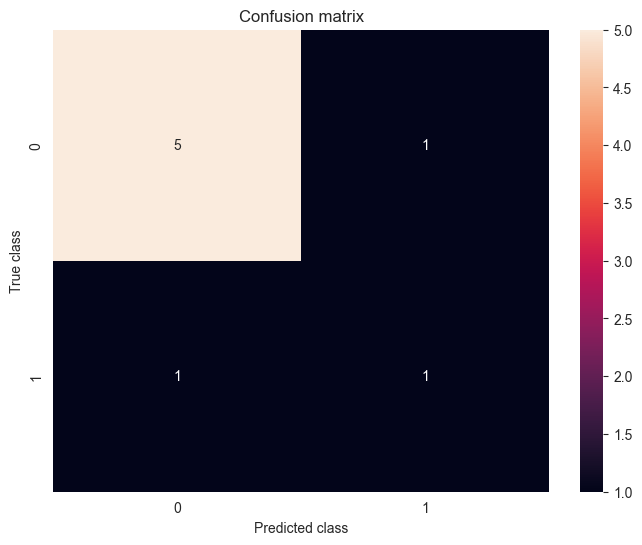

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_lr = lr_opt.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_lr, labels=[0, 1])
plt.figure(figsize=[8, 6])
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class');

In [16]:
import numpy as np

n_channel = 3
test_channel = channels_list_df[n_channel]
test_no_label = test_channel.drop(['label'], axis=1)
#n_window = 4
#test_window = np.array(test_no_label.iloc[n_window]).reshape(1, 1280)
test_window = test_no_label

print(test_window.shape)

# other channel, window with label to test predict label 1 (jaw)
lr_opt.predict(test_window)

(32, 640)


array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [21]:
import pickle

# Saving model
filename = '../../models/channel'+ str(n_channel) + '_regression.sav'
pickle.dump(lr_opt, open(filename, 'wb'))